<a href="https://colab.research.google.com/github/msaddamhussain07/MachineLearning/blob/main/Basic_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic classification: Classify images of clothing

## Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.9.2


## Import the dataset

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

## Explore the data

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

## Preprocess the data

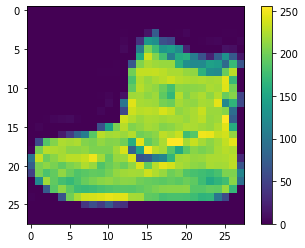

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images/250.0
test_images = test_images/250.0

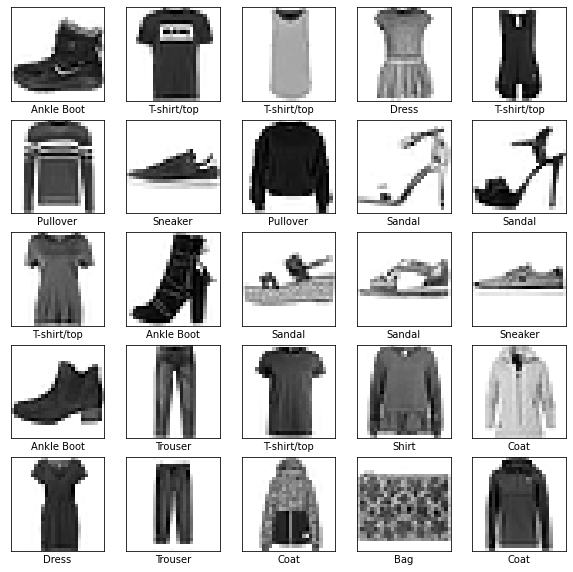

In [17]:
# To verify data is in correct format and ready for the model
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [19]:
# Setup the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

## Compile the model

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

## Train model

### Feed the model

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4960 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3779 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3363 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3138 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2965 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2808 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2692 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2486 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.239

### Evaluate accuracy

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 1s - loss: 0.3491 - accuracy: 0.8795 - 1s/epoch - 4ms/step

Test Accuracy: 0.8794999718666077


## Mak predictions

In [26]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [28]:
predictions[0]

array([7.71441151e-08, 4.91355863e-08, 5.46320189e-09, 1.05799515e-10,
       2.29411242e-07, 4.19264165e-04, 1.64753207e-08, 1.37274722e-02,
       4.56868321e-09, 9.85852778e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

In [33]:
# Graph this to look at the fullset of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.xticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predictaed_label = np.argmax(predictions_array)
  if predictaed_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predictaed_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

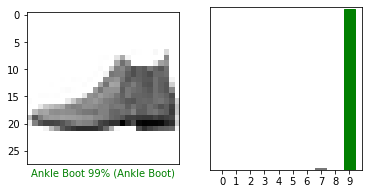

In [34]:
# Verify prediction
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

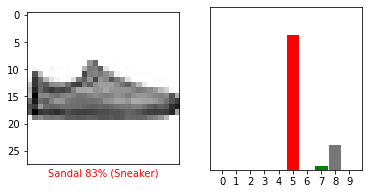

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

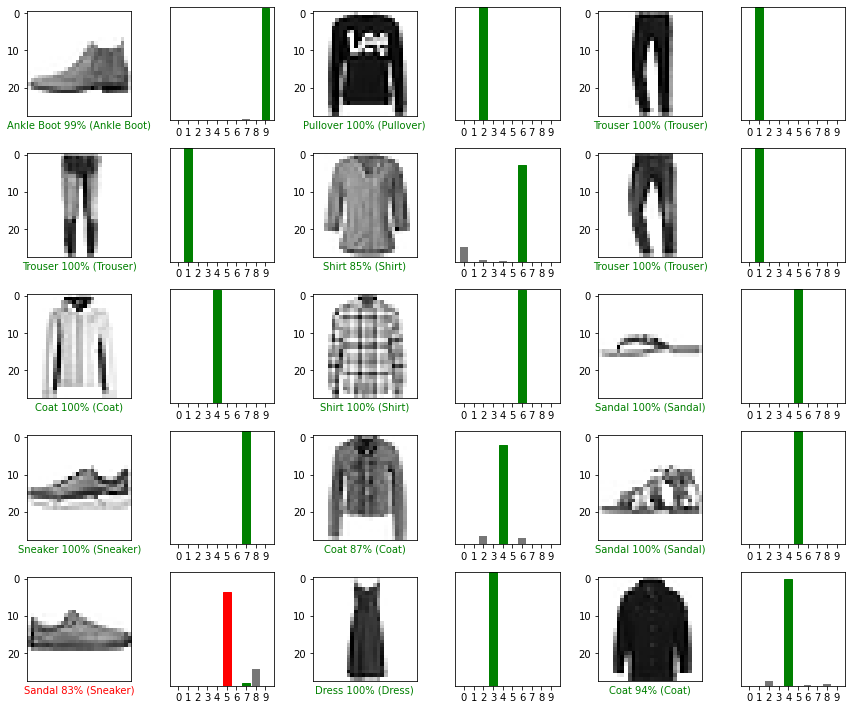

In [38]:
# Plotting several images with their predictions
# Plot the first X test images, their predicted labels, and the true labels.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [40]:
# Grab an image form tst dataset
img = test_images[9]
print(img.shape)

(28, 28)


In [41]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [43]:
# Now predict the correct label for this image
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 28ms/step
[[5.6270590e-08 6.3770496e-11 1.1581590e-08 1.7270760e-10 9.6164821e-10
  2.1681064e-05 1.5323900e-08 9.9996805e-01 1.7490241e-07 9.9266072e-06]]


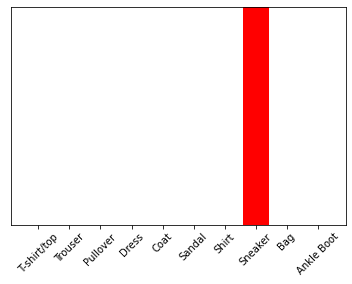

In [44]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [45]:
np.argmax(predictions_single[0])

7